## Demo for learning dual channel PSF from bead data

##### Setup environment

In [1]:
import sys
sys.path.append("..")
from psflearning.psflearninglib import psflearninglib
from psflearning import io
from psflearning.makeplots import *

##### Create psflearning object and load the config file
$\small\color{skyblue}{\mathrm{basefile}}$: config file with all parameters  
$\small\color{skyblue}{\mathrm{psftype}}$:  `'voxel', 'zernike'`  
$\small\color{skyblue}{\mathrm{sysfile}}$: config file with microscope specific parameters  
For advanced user, pass in base file only as below to interact with all parameters:   
```python
    L.param = io.param.combine('config_base')
```

In [2]:
L = psflearninglib()
L.param = io.param.combine(basefile='config_base',psftype='zernike',channeltype='4pi',sysfile='4pi')

##### Edit user defined parameters

In [3]:
L.param.datapath = r'E:\EMBL files\data for PSF learning\bead data\01-08-2022 bead\40nm_600/'
L.param.savename = L.param.datapath + 'psfmodel'
L.param.keyword = 'bead' # keyword for your data file
L.param.subfolder = 'bead' # keyword for subfolder name if each data file is saved in a individual folder, set to '' if no subfolder
L.param.gain = 0.44
L.param.ccd_offset = 100
L.param.FOV.z_step = 1  
L.param.pixel_size.z = 0.05 # micron, equal to z_step*stepsize_of_the_data
L.param.roi.max_bead_number = 20 # lower this number if out of memory 

Optional parameters for zernike PSF learning, change cell type to $\small\color{#318CE7}{\mathrm{Python}}$ to activate the cell  
Parameter | Options | Default
--- | --- | ---
$\small\color{skyblue}{\mathrm{PSFtype}}$   | `'zernike', 'pupil'` | `'zernike'`


##### Start learning

In [4]:
images = L.load_data()
L.getpsfclass()
dataobj = L.prep_data(images)
for k in range(0,1): # increase iteration number if necessary
    psfobj,fitter = L.learn_psf(dataobj,time=0)
resfile = L.save_result(psfobj,dataobj,fitter)

E:\EMBL files\data for PSF learning\bead data\01-08-2022 bead\40nm_600\bead10_step50nm_060\bead10_step50nm__560_00000_00020_mode000_amp000.mat
E:\EMBL files\data for PSF learning\bead data\01-08-2022 bead\40nm_600\bead11_step50nm_061\bead11_step50nm__560_00000_00020_mode000_amp000.mat
E:\EMBL files\data for PSF learning\bead data\01-08-2022 bead\40nm_600\bead12_step50nm_062\bead12_step50nm__560_00000_00020_mode000_amp000.mat
E:\EMBL files\data for PSF learning\bead data\01-08-2022 bead\40nm_600\bead13_step50nm_063\bead13_step50nm__560_00000_00020_mode000_amp000.mat
E:\EMBL files\data for PSF learning\bead data\01-08-2022 bead\40nm_600\bead14_step50nm_064\bead14_step50nm__560_00000_00020_mode000_amp000.mat
E:\EMBL files\data for PSF learning\bead data\01-08-2022 bead\40nm_600\bead15_step50nm_065\bead15_step50nm__560_00000_00020_mode000_amp000.mat
E:\EMBL files\data for PSF learning\bead data\01-08-2022 bead\40nm_600\bead16_step50nm_066\bead16_step50nm__560_00000_00020_mode000_amp000.mat

3/6: learning: 58/100 [00:05s]  9.97it/s, current loss: 0.60220, total time: 5.81s
3/6: learning: 57/100 [00:04s] 11.58it/s, current loss: 0.56149, total time: 10.73s
3/6: learning: 56/100 [00:04s] 11.58it/s, current loss: 0.58729, total time: 15.57s
3/6: learning: 57/100 [00:04s] 11.55it/s, current loss: 0.56195, total time: 20.50s
3/6: learning: 208/250 [01:18s]  2.64it/s, current loss: 2.16881, total time: 99.31s      
4/6: calculating spline coefficients: 4/4 [00:10s]  2.65s/it total time: 109.93s
5/6: localization: 4/4 [00:38s]  9.53s/it total time: 148.04s


outlier id: [10]
rois shape channel 0: (19, 3, 21, 21, 21)
rois shape channel 1: (19, 3, 21, 21, 21)
rois shape channel 2: (19, 3, 21, 21, 21)
rois shape channel 3: (19, 3, 21, 21, 21)


3/6: learning: 30/250 [00:12s]  2.47it/s, current loss: 2.14414, total time: 160.19s
4/6: calculating spline coefficients: 4/4 [00:10s]  2.64s/it total time: 170.76s
5/6: localization: 4/4 [00:34s]  8.61s/it total time: 205.19s
6/6: saving results: [00:21s] total time: 227.05s


##### Show results

In [5]:
f,p = io.h5.load(resfile) # load result file

channel 0


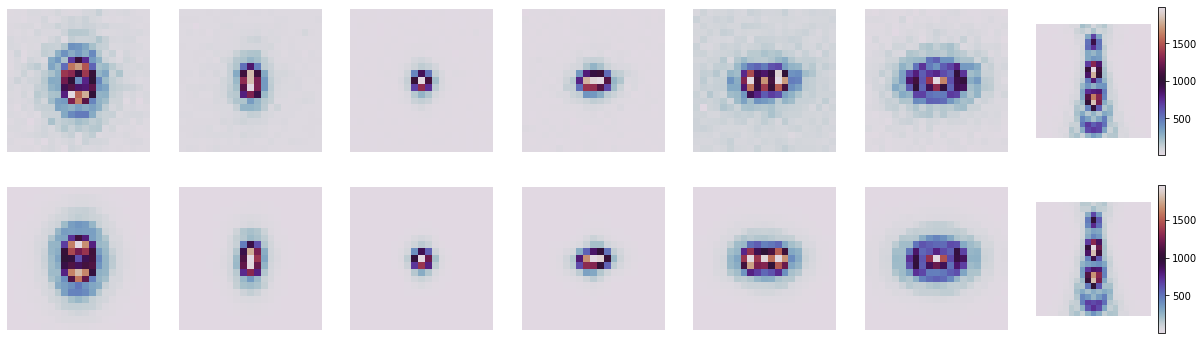

channel 1


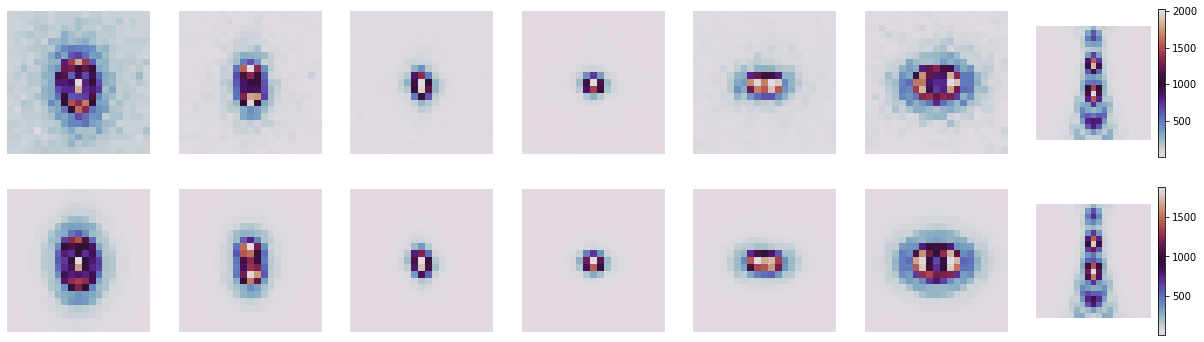

channel 2


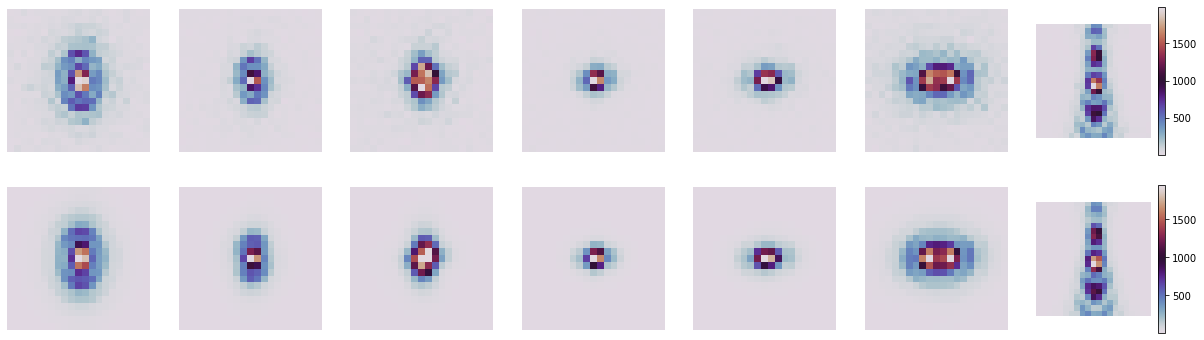

channel 3


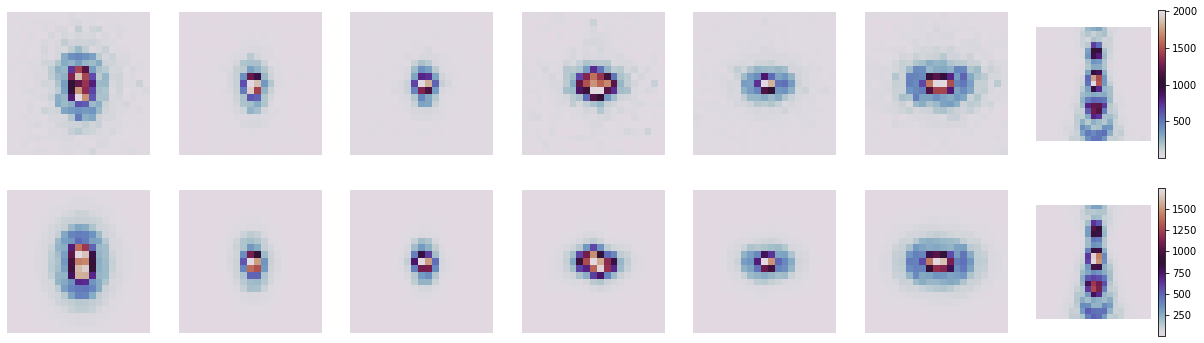

In [6]:
showpsfvsdata(f,p,index=0)

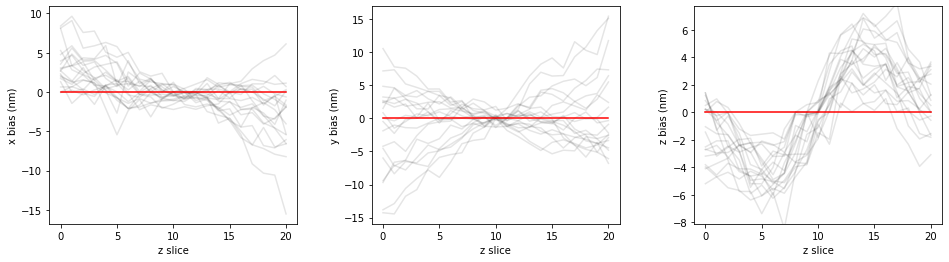

In [7]:
showlocalization(f,p)

##### Optional plots

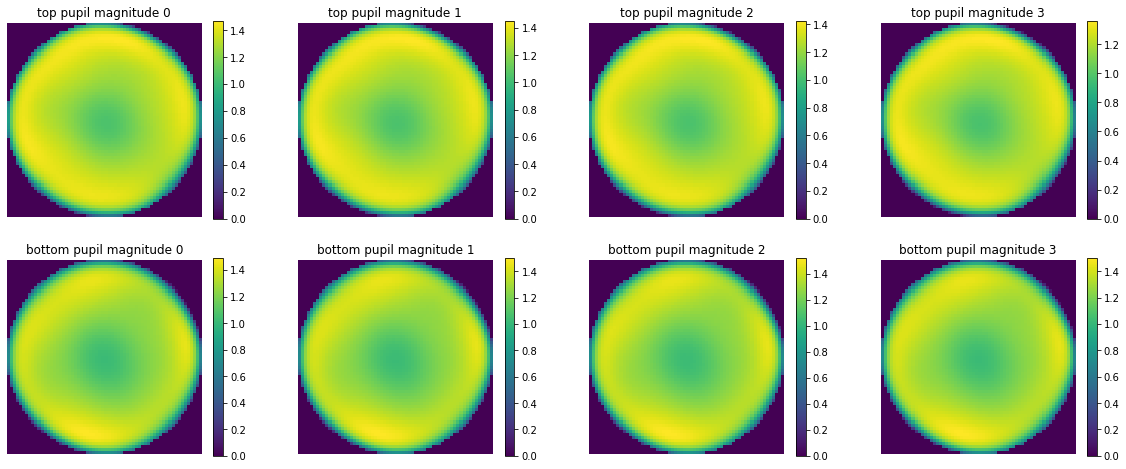

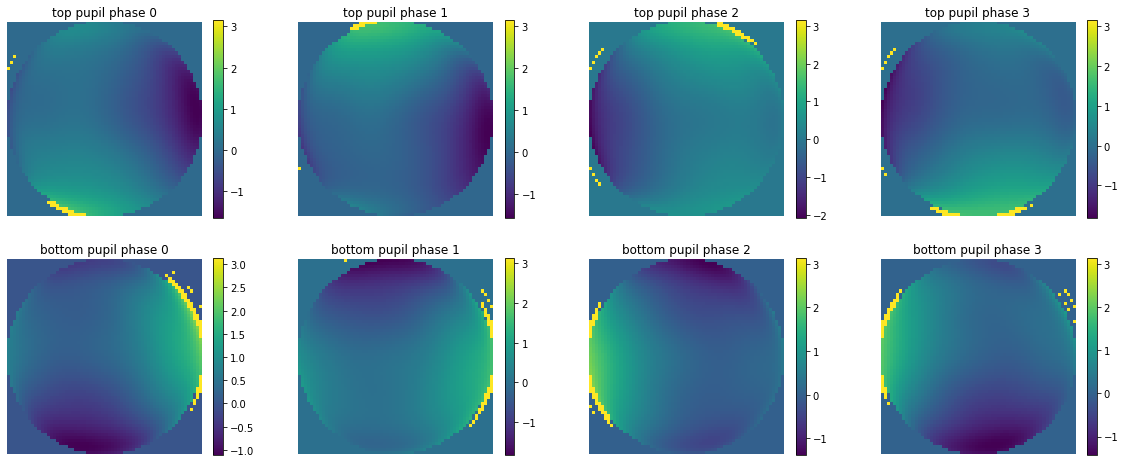

In [8]:
try:
    showpupil(f,p)
except:
    print('no learned pupil')

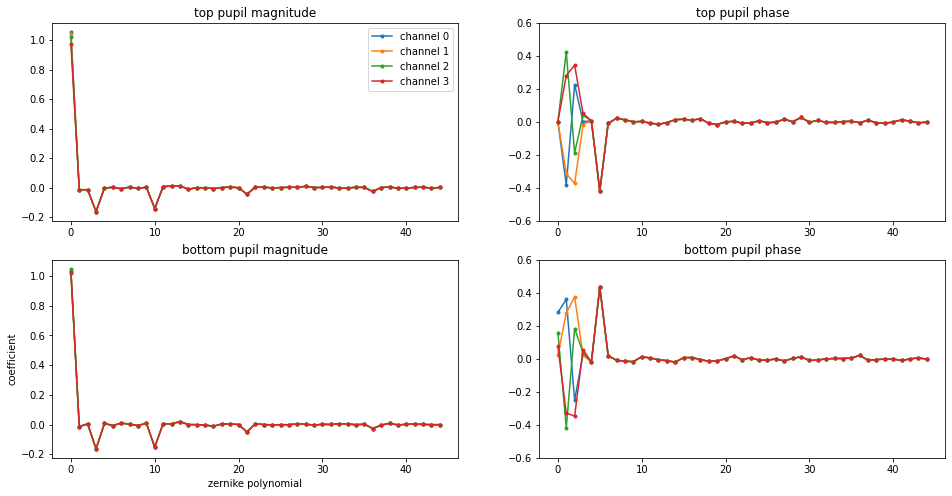

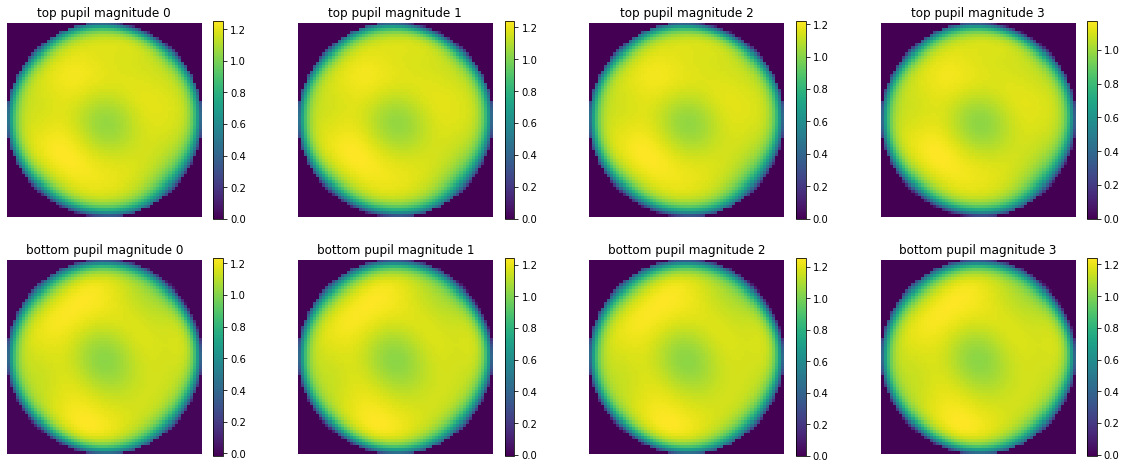

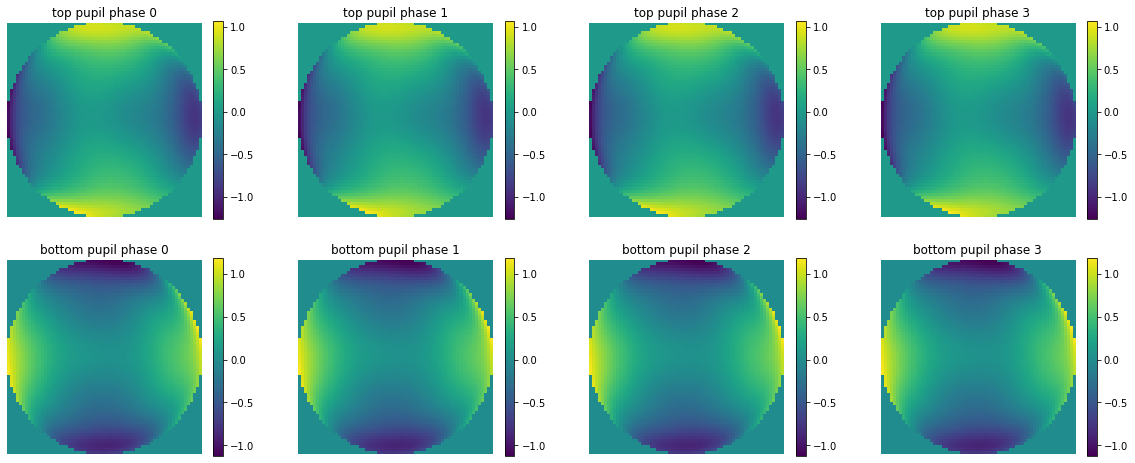

In [9]:
try:
    showzernike(f,p)
except:
    print('no learned Zernike coefficients')

[[[ 0.9978  0.0065 -0.    ]
  [-0.0051  0.9983  0.    ]
  [-0.9573  0.3957  1.    ]]

 [[ 0.9954  0.0015 -0.    ]
  [ 0.0012  0.9963  0.    ]
  [-0.6129  1.4544  1.    ]]

 [[ 0.9959 -0.006  -0.    ]
  [ 0.0058  0.9983  0.    ]
  [-0.3719  0.8635  1.    ]]]


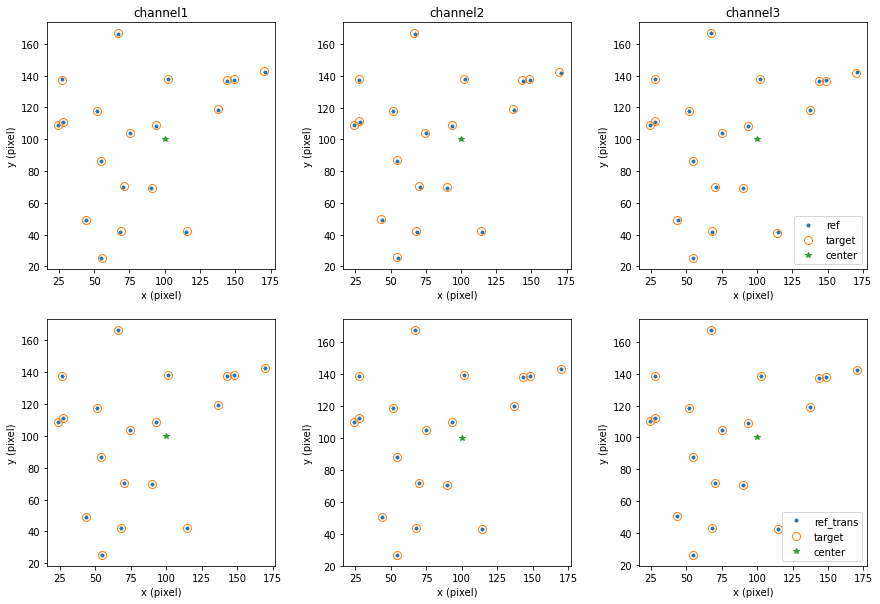

In [10]:
showtransform(f)
np.set_printoptions(precision=4,suppress=True)
print(f.res.T)

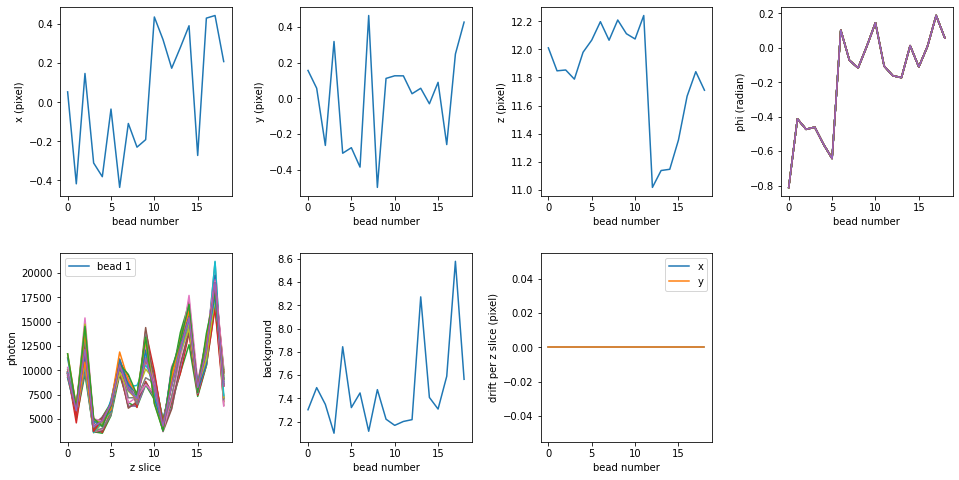

In [11]:
showlearnedparam(f,p)

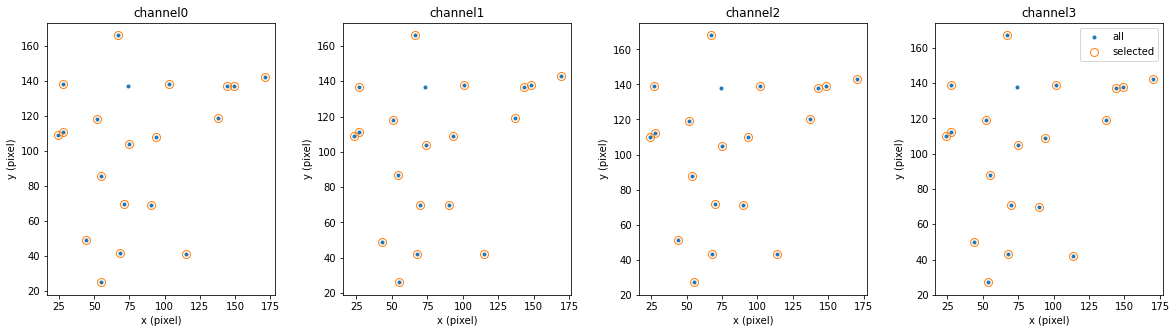

In [12]:
showcoord(f,p)